## 参考答案
os:本答案仅供参考，里面有很多可以自己查找网上资料及参照PPT完成的内容，比如模型的选择、模型评价指标的选取等</br>
请勿重新执行模型评价指标里的cell，运行时间很长!!!

## 1. 分类练习
对census_income数据集进行预处理（包括但不限于填充缺失值、数据标准化、标称数据编码）。  
以最后一列“>50K”为正类，“<=50K”为负类，选择至少4种分类模型进行建模，并进行结果评估和比较。

数据集字段介绍参见：http://archive.ics.uci.edu/ml/datasets/Census+Income </br>
请利用处理好的'census_income.csv'作为数据集

In [1]:
import pandas as pd

income_data = pd.read_csv(r"census_income.csv")
'''
观察到数据集中既有离散（定类）类型的特征（性别、种族等），也有连续（定量或定序）类型的特征（年龄、资本利得记录等）
'''
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
'''
看到数据集中的缺失列和缺失值较少，所以直接将缺失值删除。
'''
income_data.dropna(inplace = True)
income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#区分不同类型的特征，查看各特征的情况
# 连续型特征
numeric_features = [
                    'age',
                    'fnlwgt', 
                    'education-num',
                    'capital-gain', 
                    'capital-loss', 
                    'hours-per-week',                     
                   ]
# 离散型特征
cat_features = [
                 'workclass',              
                 'education',            
                 'marital-status', 
                 'occupation', 
                 'relationship', 
                 'race', 
                 'sex',
                 'native-country'
]
income_data[numeric_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
income_data[cat_features].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


In [6]:
#可以通过value_counts查看离散特征的取值情况这里只演示workclass列
income_data['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [7]:
#在模型训练之前，需要将离散即定类数据转化为定量或者定序数据，这样模型才能识别该特征
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
income_data[cat_features] = income_data[cat_features].apply(le.fit_transform)
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [8]:
#标准化连续型特征的量纲
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
income_data[numeric_features] = scaler.fit_transform(income_data[numeric_features])
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,0.043338,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,38,<=50K
1,0.452055,4,0.047277,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,38,<=50K
2,0.287671,2,0.137244,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,38,<=50K
3,0.493151,2,0.150212,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,38,<=50K
4,0.150685,2,0.220703,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959,4,<=50K


In [9]:
#查看预测Income的取值情况
'数据存在较大的样本不平衡的情况，即负类样本数量远大于正类样本数量，这里不做过多要求，可以自行搜索实际场景中解决该问题的各种方法'
income_data['income'].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

<AxesSubplot:>

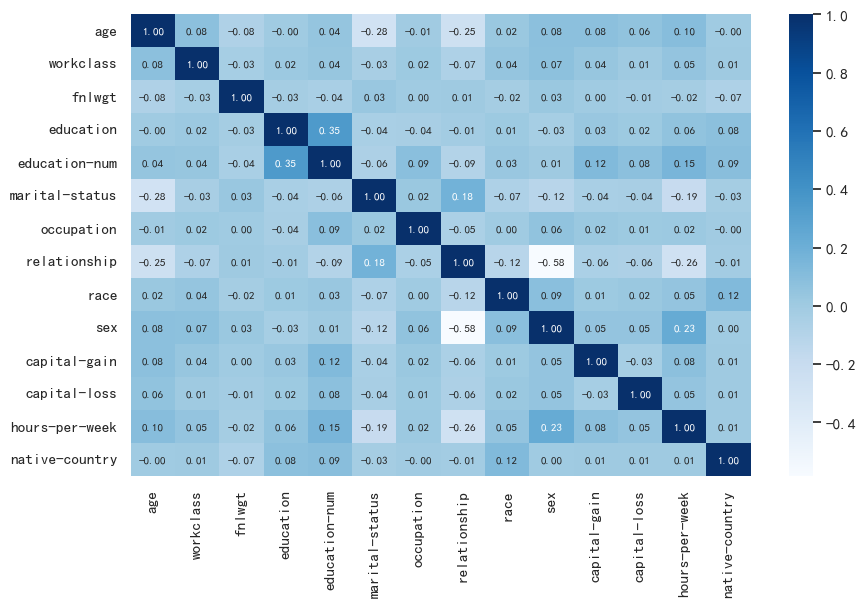

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文字体显示乱码问题
plt.rcParams['axes.unicode_minus']=False
sns.set(font='SimHei')

#查看所有变量的相关性
plt.figure(figsize=(10,6))
#画图：相关性图
dcorr = income_data.corr(method='pearson')#默认为'pearson'检验，可选'kendall','spearman'
## 描述两变量相关性
sns.heatmap(data=dcorr,annot=True,fmt=".2f",
            annot_kws={'size':8,'weight':'normal'},
            cmap=plt.get_cmap('Blues'))

In [11]:
#训测划分8:2
from sklearn.model_selection import train_test_split

#构造训练集x,y是标签
X = income_data.iloc[:,:14]
y =  income_data.iloc[:,-1]
y.replace({' <=50K':0,' >50K':1},inplace = True)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
'数据处理好就是调包侠！'
#导入分类模型 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import roc_curve,auc,roc_auc_score

#模型实例化
clf1 = GaussianNB()
clf2 = LogisticRegression(max_iter=10000)
clf3 = svm.SVC(probability=True)
clf4 = RandomForestClassifier()
clf5 = AdaBoostClassifier()

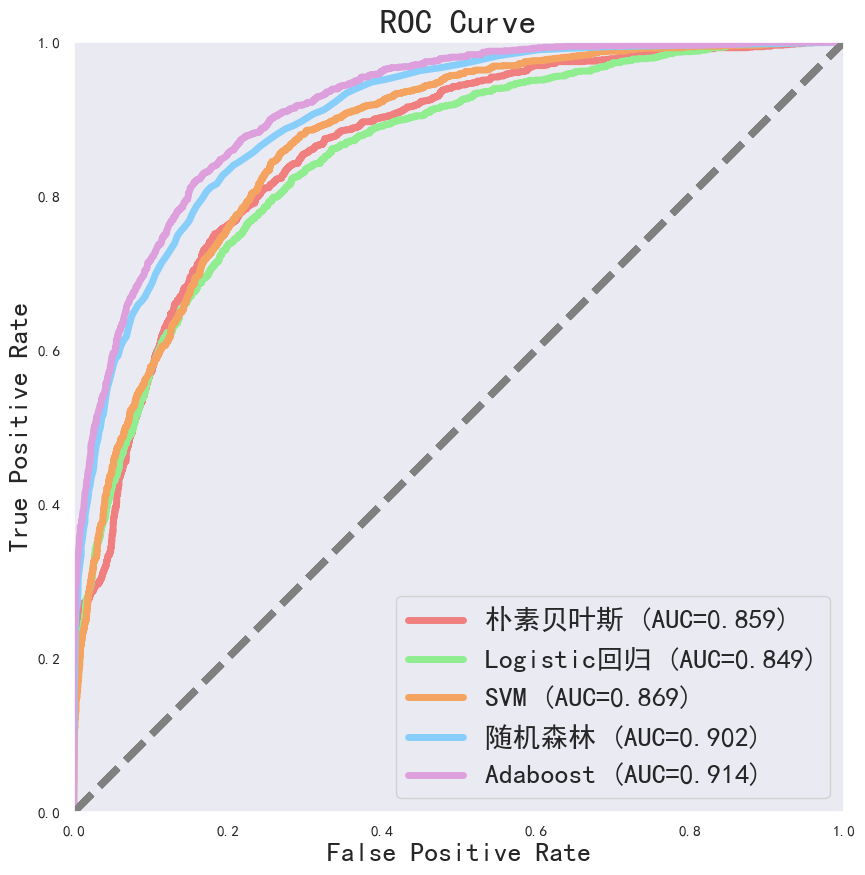

In [13]:
#ROC曲线
names = ['朴素贝叶斯','Logistic回归','SVM','随机森林','Adaboost']

clfs = [clf1,clf2,clf3,clf4,clf5]

colors = ['lightcoral', 'lightgreen','sandybrown','lightskyblue','plum']

plt.figure(figsize=(10, 10))

for (name, clf, colorname) in zip (names, clfs, colors):
    clf.fit(X_train,y_train)
    y_test_preds = clf.predict(X_test)
    y_test_predprob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
    
    plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
    plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title('ROC Curve',fontsize=25)
    plt.grid(False)
    plt.legend(loc='lower right',fontsize=20)

plt.show()

In [14]:
#模型评价
for clf, label in zip([clf1, clf2, clf3, clf4, clf5], [
       'Bayes', 'Logistic Regression', 'SVM','Random Forest', 'AdaBoost'
]):
    start = time.time()
    #依次换成精确率，召回率，F1值（cv是交叉验证次数）
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    end = time.time()
    running_time = end - start
    print("Accuracy: %0.6f (+/- %0.2f),耗时%0.2f秒。模型名称:[%s]" %
          (scores.mean(), scores.std(), running_time, label))

Accuracy: 0.798914 (+/- 0.01),耗时0.15秒。模型名称:[Bayes]
Accuracy: 0.817813 (+/- 0.00),耗时15.16秒。模型名称:[Logistic Regression]
Accuracy: 0.753077 (+/- 0.00),耗时1286.67秒。模型名称:[SVM]
Accuracy: 0.853454 (+/- 0.00),耗时23.79秒。模型名称:[Random Forest]
Accuracy: 0.856397 (+/- 0.00),耗时8.10秒。模型名称:[AdaBoost]


In [15]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5], [
       'Bayes', 'Logistic Regression', 'SVM','Random Forest', 'AdaBoost'
]):
    start = time.time()
    #召回率
    scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=5)
    end = time.time()
    running_time = end - start
    print("Recall: %0.6f (+/- %0.2f),耗时%0.2f秒。模型名称[%s]" %
          (scores.mean(), scores.std(), running_time, label))

Recall: 0.343398 (+/- 0.02),耗时0.16秒。模型名称[Bayes]
Recall: 0.440411 (+/- 0.02),耗时16.42秒。模型名称[Logistic Regression]
Recall: 0.000000 (+/- 0.00),耗时1280.00秒。模型名称[SVM]
Recall: 0.624877 (+/- 0.02),耗时23.91秒。模型名称[Random Forest]
Recall: 0.600873 (+/- 0.01),耗时8.15秒。模型名称[AdaBoost]


In [16]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5], [
       'Bayes', 'Logistic Regression', 'SVM','Random Forest', 'AdaBoost'
]):
    start = time.time()
    #F1值
    scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    end = time.time()
    running_time = end - start
    print("F1: %0.6f (+/- %0.2f),耗时%0.2f秒。模型名称[%s]" %
          (scores.mean(), scores.std(), running_time, label))

F1: 0.457346 (+/- 0.02),耗时0.17秒。模型名称[Bayes]
F1: 0.543993 (+/- 0.01),耗时16.09秒。模型名称[Logistic Regression]
F1: 0.000000 (+/- 0.00),耗时1306.33秒。模型名称[SVM]
F1: 0.679443 (+/- 0.01),耗时23.24秒。模型名称[Random Forest]
F1: 0.673820 (+/- 0.01),耗时8.01秒。模型名称[AdaBoost]


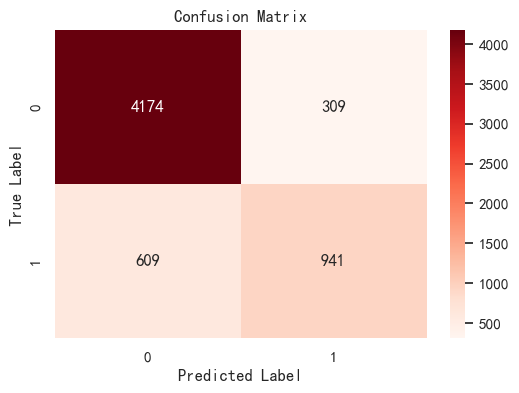

In [17]:
'''看到随机森林的AUC值比较高，可以调一下混淆矩阵和特征重要性排序看一下'''
clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_test)
plt.figure(figsize=(6,4))
cm=CM(y_test,y_pred)
labels=[0,1]
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap=plt.get_cmap('Reds'))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [18]:
import numpy as np

importances=np.reshape(np.round(np.array(clf4.feature_importances_),3),(-1,1))
feature_list=np.reshape(X_train.columns.tolist(),(-1,1))
feature_importances=np.hstack((feature_list, importances))
#print(importances,feature_list,feature_importances)

feature_importances=pd.DataFrame(feature_importances,columns=('features','importance'))
feature_importances.sort_values(by=['importance'],ascending = True,inplace=True)
feature_importances

,features,importance
9,sex,0.013
8,race,0.014
13,native-country,0.015
3,education,0.034
11,capital-loss,0.035
1,workclass,0.039
6,occupation,0.068
5,marital-status,0.071
12,hours-per-week,0.084
4,education-num,0.092


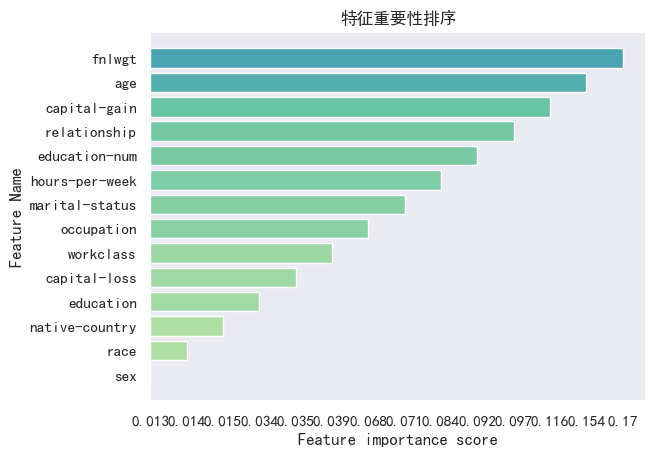

In [19]:
plt.grid(False)
plt.title("特征重要性排序")
plt.ylabel("Feature Name")
plt.xlabel("Feature importance score")
colors = [plt.cm.Spectral(float(i)+0.68) for i in feature_importances['importance']]
plt.barh(feature_importances['features'], feature_importances['importance'],color=colors)
plt.show()

## 2. 聚类练习
对预处理后的census_income数据集中除最后一列的所有特征选择不同模型进行聚类，并进行结果比较和解释。

### (1) 密度聚类

In [20]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [21]:
# 定义 DBSCAN 模型，设置 eps 和 min_samples 参数
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X)

#聚类结果评估
print("Silhouette score:", round(silhouette_score(X, dbscan.labels_),6))
 
print("Calinski-Harabasz score:", round(calinski_harabasz_score(X, dbscan.labels_),2))
 
print("Davies-Bouldin Index:", round(davies_bouldin_score(X, dbscan.labels_),2))

Silhouette score: 0.261047
Calinski-Harabasz score: 21.87
Davies-Bouldin Index: 1.37


### (2) K-means聚类

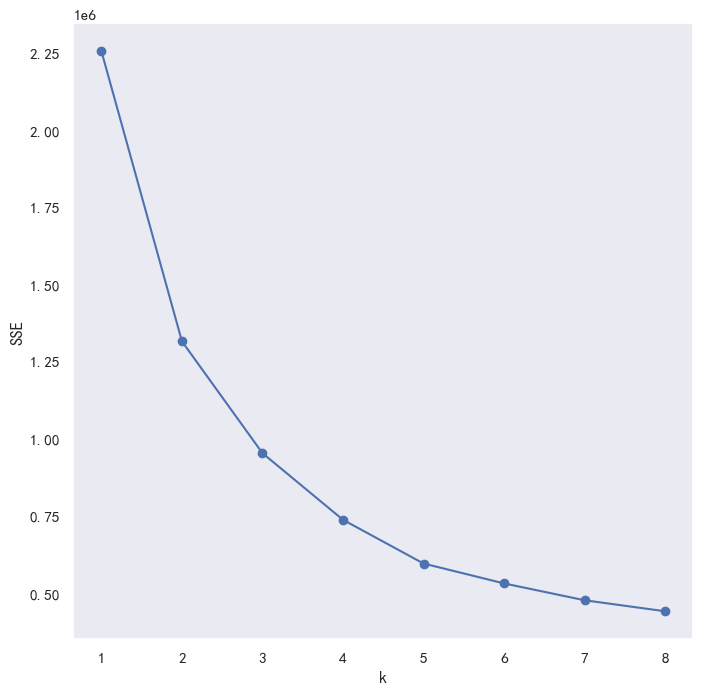

In [22]:
from sklearn.cluster import KMeans
# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
K = range(1, 9)

plt.figure(figsize=(8, 8))
plt.grid(False)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(K, SSE, 'o-')
plt.show()

使用“肘部法则”选取k值：图中可以看出，k=3的时候差不多是肘点，所以，选择k=3.

In [23]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(X)
result

KMeans(n_clusters=3)

In [27]:
model_label = X.join(pd.DataFrame(result.labels_))  # .labels_ 表示这一个数据点属于什么类
model_label = model_label.rename(columns={0: "clustor"})
model_label.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,clustor
14872,0.123288,2,0.158577,8,0.666667,0,2,3,4,1,0.0,0.0,0.397959,38,1.0
9924,0.465753,2,0.126604,6,0.266667,2,2,0,4,1,0.0,0.0,0.500000,38,0.0
26199,0.356164,1,0.067681,9,0.800000,2,9,0,4,1,0.0,0.0,0.397959,38,0.0
27386,0.328767,2,0.186819,11,0.533333,2,2,0,4,1,0.0,0.0,0.397959,38,0.0
13863,0.438356,4,0.178170,15,0.600000,2,3,0,4,1,0.0,0.0,0.602041,38,0.0
9277,0.095890,0,0.010756,9,0.800000,4,9,1,3,0,0.0,0.0,0.397959,38,0.0
6212,0.356164,2,0.263678,15,0.600000,2,12,0,2,1,0.0,0.0,0.397959,22,1.0
15214,0.082192,2,0.065034,11,0.533333,4,7,1,4,0,0.0,0.0,0.397959,38,0.0
29071,0.397260,2,0.118255,15,0.600000,2,11,0,4,1,0.0,0.0,0.500000,38,0.0
23413,0.452055,2,0.089703,11,0.533333,6,0,4,4,0,0.0,0.0,0.346939,38,0.0


<AxesSubplot:ylabel='clustor'>

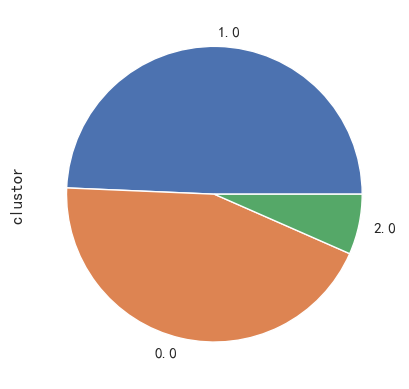

In [28]:
#看聚类结果分布
model_label.clustor.value_counts().plot(kind = 'pie') 

## 3. 关联规则练习
利用PPT中处理大规模数据的方法'data_generater'读取“store_data.csv”并进行关联规则挖掘，找出支持度不小于0.0045，置信度不小于0.2的关联规则，并对结果进行解释。

In [29]:
def data_generator(filename):
    """
    Data generator, needs to return a generator to be called several times.
    """
    def data_gen():
        with open(filename) as file:
            for line in file:
                yield tuple(k.strip() for k in line.split(','))
    return data_gen()

In [30]:
from efficient_apriori import apriori
transactions = data_generator("store_data.csv")
itemsets, rules = apriori(transactions, min_support=0.0045,  min_confidence=0.2)

In [31]:
rules

[{almonds} -> {burgers},
 {almonds} -> {chocolate},
 {almonds} -> {eggs},
 {almonds} -> {green tea},
 {almonds} -> {milk},
 {almonds} -> {mineral water},
 {almonds} -> {spaghetti},
 {avocado} -> {chocolate},
 {avocado} -> {french fries},
 {avocado} -> {milk},
 {avocado} -> {mineral water},
 {avocado} -> {spaghetti},
 {black tea} -> {eggs},
 {black tea} -> {mineral water},
 {black tea} -> {spaghetti},
 {brownies} -> {eggs},
 {brownies} -> {french fries},
 {brownies} -> {mineral water},
 {brownies} -> {spaghetti},
 {burgers} -> {eggs},
 {burgers} -> {french fries},
 {burgers} -> {green tea},
 {ham} -> {burgers},
 {burgers} -> {milk},
 {burgers} -> {mineral water},
 {burgers} -> {spaghetti},
 {butter} -> {chocolate},
 {butter} -> {eggs},
 {butter} -> {french fries},
 {butter} -> {green tea},
 {butter} -> {milk},
 {butter} -> {spaghetti},
 {cake} -> {eggs},
 {cake} -> {french fries},
 {cake} -> {mineral water},
 {cake} -> {spaghetti},
 {carrots} -> {mineral water},
 {carrots} -> {spaghetti